<a href="https://colab.research.google.com/github/MrPaul722/ECE239.2AS/blob/main/Language_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Setup

Please run the code below to mount drive if you are running on colab.

Please ignore if you are running on your local machine.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/ECE_239AS.2/Project3_skeleton

/content/drive/MyDrive/ECE_239AS.2/Project3_skeleton


# Language Modeling and Transformers

The project will consist of two broad parts.

1. **Baseline Generative Language Model**: We will train a simple Bigram language model on the text data. We will use this model to generate a mini story.
2. **Implementing Mini GPT**: We will implement a mini version of the GPT model layer by layer and attempt to train it on the text data. You will then load pretrained weights provided and generate a mini story.

## Some general instructions

1. Please keep the name of layers consistent with what is requested in the `model.py` file for each layer, this helps us test in each function independently.
2. Please check to see if the bias is to be set to false or true for all linear layers (it is mentioned in the doc string)
3. As a general rule please read the docstring well, it contains information you will need to write the code.
4. All configs are defined in `config.py` for the first part. While you are writing the code, do not change the values in the config file since we use them to test. Once you have passed all the tests please feel free to vary the parameter as you please.
5. You will need to fill in `train.py` and run it to train the model. If you are running into memory issues please feel free to change the `batch_size` in the `config.py` file. If you are working on Colab please make sure to use the GPU runtime and feel free to copy over the training code to the notebook.

In [ ]:
!pip install numpy torch tiktoken wandb einops # Install all required packages

In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
import torch
import tiktoken

In [4]:
from model import BigramLanguageModel, SingleHeadAttention, MultiHeadAttention, FeedForwardLayer, LayerNorm, TransformerLayer, MiniGPT
from config import BigramConfig, MiniGPTConfig
import tests

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
# If not provided, download from https://drive.google.com/file/d/1g09qUM9WibdfQVgkj6IAj8K2S3SGwc91/view?usp=sharing
path_to_bigram_tester = "/content/drive/MyDrive/ECE_239AS.2/Project3_skeleton/pretrained_models/MiniGPT/bigram_tester.pt" # Load the bigram model with name bigram_tester.pt
path_to_gpt_tester = "/content/drive/MyDrive/ECE_239AS.2/Project3_skeleton/pretrained_models/MiniGPT/minigpt_tester.pt" # Load the gpt model with name minigpt_tester.pt

##  Bigram Language Model (10 points)

A bigram language model is a type of probabilistic language model that predicts a word given the previous word in the sequence. The model is trained on a text corpus and learns the probability of a word given the previous word.



### Implement the Bigram model (5 points)

Please complete the `BigramLanguageModel` class in model.py. We will model a Bigram language model using a simple MLP with one hidden layer. The model will take in the previous word index and output the logits over the vocabulary for the next word.

In [8]:
# Test implementation for Bigram Language Model
model = BigramLanguageModel(BigramConfig)
tests.check_bigram(model, path_to_bigram_tester, device)

'TEST CASE PASSED!!!'

### Training the Bigram Language Model (2.5 points)

Complete the code in `train.py` to train the Bigram language model on the text data. Please provide plots for both the training and validation in the cell below.

Some notes on the training process:

1. You should be able to train the model slowly on your local machine.
2. Training it on Colab will help with speed.
3.  <span style="color:red">To get full points for this section it is sufficient to show that the loss is decreasing over time</span>. You should see it saturate to a value close to around 5-6 but as long as you see it decreasing then saturating you should be good.
4. Please log the loss curves either on wandb, tensorboard or any other logger of your choice and please attach them below.

In [9]:
from train import solver

In [ ]:
solver(model_name="bigram")

number of trainable parameters: 3.27M


Streaming output truncated to the last 5000 lines.
Iteration 250100, Train Loss: 4.877995014190674 Eval Loss: 3.815951521396637
Running evaluation at iteration 250200...
Iteration 250200, Train Loss: 4.042382717132568 Eval Loss: 3.9448913979530333
Running evaluation at iteration 250300...
Iteration 250300, Train Loss: 4.452442169189453 Eval Loss: 3.8816947460174562
Running evaluation at iteration 250400...
Iteration 250400, Train Loss: 3.6545801162719727 Eval Loss: 3.9212216925621033
Running evaluation at iteration 250500...
Iteration 250500, Train Loss: 4.939520835876465 Eval Loss: 3.831873588562012
Running evaluation at iteration 250600...
Iteration 250600, Train Loss: 3.287876844406128 Eval Loss: 3.851326928138733
Running evaluation at iteration 250700...
Iteration 250700, Train Loss: 3.329890012741089 Eval Loss: 3.894927349090576
Running evaluation at iteration 250800...
Iteration 250800, Train Loss: 3.6534149646759033 Eval Loss: 3.85690212726593
Running evaluation at iteration 250

### Train and Valid Plots


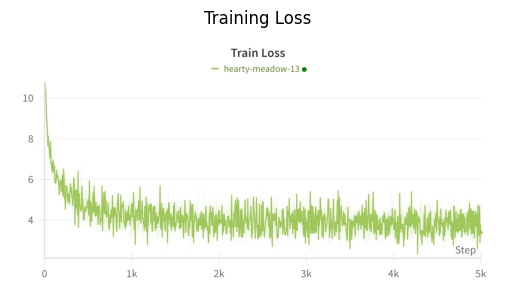

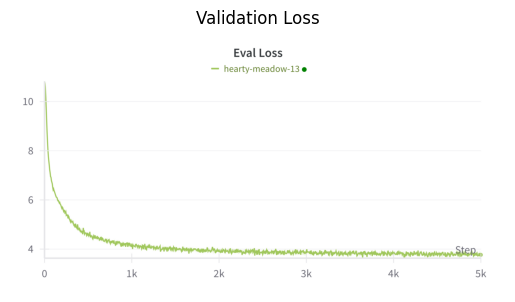

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('/content/drive/MyDrive/ECE_239AS.2/Project3_skeleton/Graphs/Training_Loss.png')
plt.figure()
plt.imshow(img1)
plt.axis('off')     # hide axes
plt.title('Training Loss')
plt.show()

img2 = mpimg.imread('/content/drive/MyDrive/ECE_239AS.2/Project3_skeleton/Graphs/Eval_Loss.png')
plt.figure()
plt.imshow(img2)
plt.axis('off')
plt.title('Validation Loss')
plt.show()


### Generation (2.5 points)

Complete the code in the `generate` method of the Bigram class and generate a mini story using the trained Bigram language model. The model will take in the previous word index and output the next word index.

Start with the following seed sentence:
    
    `"once upon a time"`
    

In [10]:
# TODO: Specify the path to your trained model
model_path = "/content/drive/MyDrive/ECE_239AS.2/Project3_skeleton/models/bigram/mini_model_checkpoint_90000.pt"
model = BigramLanguageModel(BigramConfig)
tokenizer = tiktoken.get_encoding("gpt2")
model.load_state_dict(torch.load(model_path)["model_state_dict"])

<All keys matched successfully>

In [ ]:
model.to(device)
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time and happy to be goodbye and made a loud fox with his plan, long tired and dad looked on the sharp someone the animals. Timmy was a time, one would sleep a new bottle Joe. She dance and said on a little boy named I the bunny and agreed to see the parts woke the dog named he saw a time, pets flowers got problem all day, a time, but they liked that it to buy him play.
One day, but that Lily. The yard was strong. It helped the full of the water. We worry, a picture over it." Do she was a picture, " coined log too. The other.Once upon a time, the park, she angry. She saw a enYour woke together all fireplace sharing and had raised butter as let of his cat remembered from go how loud womanHis friends it!"
M pear opened was very sad and said, they can chest had a time."
His. It was so stick as picked, "No,


### Observation and Analysis

Please answer the following questions.

1. What can we say about the generated text in terms of grammar and coherence?

The generated text at first glance looks like English as it strings together words and common short phrases. For example, “Once upon a time,” “One day,” “the animals”. However the grammar is quite fractured. Sentences often start in a familiar “storybook” style but then derail into ungrammatical fragments and there’s no real narrative thread or logical progression. Characters and actions appear out of nowhere, refer back to themselves incoherently, and repeatedly reset.

2. What are the limitations of the Bigram language model?

A true bigram model conditions each word only on its immediate predecessor. It has no mechanism for capturing longer‐range dependencies and therefore struggles to gather the context of the text. It models only pairwise co‐occurrence counts, so any structure or pattern that spans three or more tokens is entirely lost. Lastly, it can’t generalize grammatical rules well as each pair of words has its own parameter so it learns no abstractions beyond memorization of specific pairs.

3. If the model is scaled with more parameters do you expect the bigram model to get substantially better? Why or why not?

Simply adding more parameters won’t fundamentally solve these issues. A bigram architecture still only pays attention to one previous token, so it can’t learn to model longer dependencies or higher‐order grammar, no matter how wide or deep the network. You might improve the quality of individual conditional distributions, but you won’t gain true coherence or context beyond two‐word windows. To see substantially better long‐range structure, you need to move to at least a trigram or n-gram model (conditioning on more history) or to a transformer or recurrent architecture that can attend to or remember arbitrarily long contexts.

## Mini GPT (90 points)

We will implement a decoder style transformer model like we discussed in lecture, which is a scaled down version of the [GPT model](https://cdn.openai.com/research-covers/language-unsupervised/language_understanding_paper.pdf).

All the model components follow directly from the original [Attention is All You Need](https://arxiv.org/abs/1706.03762) paper. The only difference is we will use prenormalization and learnt positional embeddings instead of fixed ones.

We will now implement each layer step by step checking if it is implemented correctly in the process. We will finally put together all our layers to get a fully fledged GPT model.

<span style="color:red">Later layers might depend on previous layers so please make sure to check the previous layers before moving on to the next one.</span>

### Single Head Causal Attention (20 points)

We will first implement the single head causal attention layer. This layer is the same as the scaled dot product attention layer but with a causal mask to prevent the model from looking into the future.

Recall that Each head has a Key, Query and Value Matrix and the scaled dot product attention is calculated as :

\begin{equation}
\text{Attention}(Q, K, V) = \text{softmax}\left(\frac{QK^T}{\sqrt{d_k}}\right)V
\end{equation}

where $d_k$ is the dimension of the key matrix.

Figure below from the original paper shows how the layer is to be implemented.

![image](./Images/Single_Head.png)

Image credits: [Attention is All You Need Paper](https://arxiv.org/abs/1706.03762)

Please complete the `SingleHeadAttention` class in `model.py`

In [11]:
model = SingleHeadAttention(MiniGPTConfig.embed_dim, MiniGPTConfig.embed_dim//4, MiniGPTConfig.embed_dim//4) # configs are set as such for testing do not modify
tests.check_singleheadattention(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Multi Head Attention (10 points)

Now that we have a single head working, we will now scale this across multiple heads, remember that with multihead attention we compute perform head number of parallel attention operations. We then concatenate the outputs of these parallel attention operations and project them back to the desired dimension using an output linear layer.

Figure below from the original paper shows how the layer is to be implemented.

![image](./Images/MultiHead.png)

Image credits: [Attention is All You Need Paper](https://arxiv.org/abs/1706.03762)

Please complete the `MultiHeadAttention` class in `model.py` using the `SingleHeadAttention` class implemented earlier.

In [12]:
model = MultiHeadAttention(MiniGPTConfig.embed_dim, MiniGPTConfig.num_heads)
tests.check_multiheadattention(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Feed Forward Layer (5 points)

As discussed in lecture, the attention layer is completely linear, in order to add some non-linearity we add a feed forward layer. The feed forward layer is a simple two layer MLP with a GeLU activation in between.

Please complete the `FeedForwardLayer` class in `model.py`

In [13]:
model = FeedForwardLayer(MiniGPTConfig.embed_dim)
tests.check_feedforward(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### LayerNorm (10 points)

We will now implement the layer normalization layer. Layernorm is used across the model to normalize the activations of the previous layer. Recall that the equation for layernorm is given as:

\begin{equation}

\text{LayerNorm}(x) = \frac{x - \mu}{\sqrt{\sigma^2 + \epsilon}} \odot \gamma + \beta

\end{equation}

With the learnable parameters $\gamma$ and $\beta$.

Remember that unlike batchnorm we compute statistics across the feature dimension and not the batch dimension, hence we do not need to keep track of running averages.

Please complete the `LayerNorm` class in `model.py`

In [14]:
model = LayerNorm(MiniGPTConfig.embed_dim)
tests.check_layernorm(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Transformer Layer (15 points)

We have now implemented all the components of the transformer layer. We will now put it all together to create a transformer layer. The transformer layer consists of a multi head attention layer, a feed forward layer and two layer norm layers.

Please use the following order for each component (Varies slightly from the original attention paper):
1. LayerNorm
2. MultiHeadAttention
3. LayerNorm
4. FeedForwardLayer

Remember that the transformer layer also has residual connections around each sublayer.

The below figure shows the structure of the transformer layer you are required to implement.

![prenorm_transformer](./Images/Prenorm.png)

Image Credit : [CogView](https://arxiv.org/pdf/2105.13290)

Implement the `TransformerLayer` class in `model.py`

In [15]:
model =  TransformerLayer(MiniGPTConfig.embed_dim, MiniGPTConfig.num_heads)
tests.check_transformer(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Putting it all together : MiniGPT (15 points)

We are now ready to put all our layers together to build our own MiniGPT!

The MiniGPT model consists of an embedding layer, a positional encoding layer and a stack of transformer layers. The output of the transformer layer is passed through a linear layer (called head) to get the final output logits. Note that in our implementation we will use [weight tying](https://arxiv.org/abs/1608.05859) between the embedding layer and the final linear layer. This allows us to save on parameters and also helps in training.

Implement the `MiniGPT` class in `model.py`

In [16]:
model = MiniGPT(MiniGPTConfig)
tests.check_miniGPT(model, path_to_gpt_tester, device)

'TEST CASE PASSED!!!'

### Attempt at training the model (5 points)

We will now attempt to train the model on the text data. We will use the same text data as before. If needed, you can scale down the model parameters in the config file to a smaller value to make training feasible.

Use the same training script we built for the Bigram model to train the MiniGPT model. If you implemented it correctly it should work just out of the box!

**NOTE** : We will not be able to train the model to completion in this assignment. Unfortunately, without access to a relatively powerful GPU, training a large enough model to see good generation is not feasible. However, you should be able to see the loss decreasing over time. <span style="color:red">To get full points for this section it is sufficient to show that the loss is decreasing over time</span>. You do not need to run this for more than 5000 iterations or 1 hour of training.

In [ ]:
from train import solver

In [ ]:
solver(model_name="minigpt")

number of trainable parameters: 3.32M


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: paulcano356 (paulcano356-university-of-california-los-angeles) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Loss function initialized.
Optimizer initialized.
Starting training loop...
Running evaluation at iteration 0...
Iteration 0, Train Loss: 10.82659912109375 Eval Loss: 10.829351425170898
Running evaluation at iteration 10...
Iteration 10, Train Loss: 10.666894912719727 Eval Loss: 10.628310012817384
Running evaluation at iteration 20...
Iteration 20, Train Loss: 10.40039348602295 Eval Loss: 10.363215923309326
Running evaluation at iteration 30...
Iteration 30, Train Loss: 10.177623748779297 Eval Loss: 10.089073085784912
Running evaluation at iteration 40...
Iteration 40, Train Loss: 9.901958465576172 Eval Loss: 9.821290302276612
Running evaluation at iteration 50...
Iteration 50, Train Loss: 9.45096492767334 Eval Loss: 9.530232238769532
Running evaluation at iteration 60...
Iteration 60, Train Loss: 9.336501121520996 Eval Loss: 9.166419410705567
Running evaluation at iteration 70...
Iteration 70, Train Loss: 8.832380294799805 Eval Loss: 8.858261489868164
Running evaluation at iteration 8

KeyboardInterrupt: 

### Train and Valid Plots


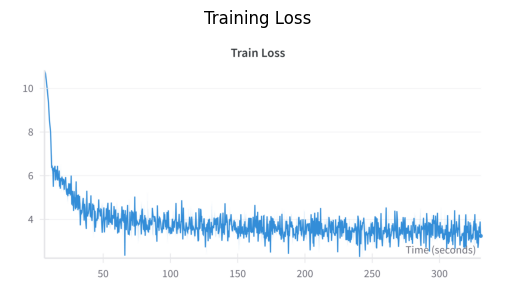

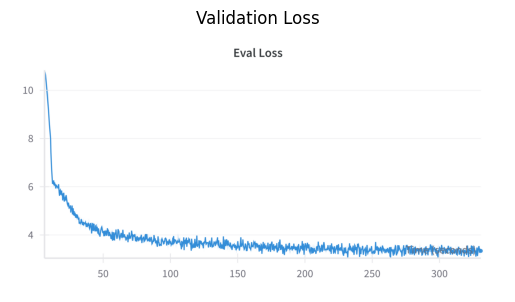

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img1 = mpimg.imread('/content/drive/MyDrive/ECE_239AS.2/Project3_skeleton/Graphs/MiniGPT_TrainingLoss.png')
plt.figure()
plt.imshow(img1)
plt.axis('off')     # hide axes
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Time (s)')
plt.show()

img2 = mpimg.imread('/content/drive/MyDrive/ECE_239AS.2/Project3_skeleton/Graphs/MiniGPT_EvalLoss.png')
plt.figure()
plt.imshow(img2)
plt.axis('off')
plt.title('Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Time (s)')
plt.show()

### Generation (5 points)


Perform generation with the MiniGPT model that you trained. After that, copy over the generation function you used for the Bigram model and generate a mini story using the same seed sentence.

    `"once upon a time"`

In [ ]:
# TODO: Specify the path to your trained model
model_path = '/content/drive/MyDrive/ECE_239AS.2/Project3_skeleton/models/minigpt/mini_model_checkpoint_20000.pt'
model = MiniGPT(MiniGPTConfig)
tokenizer = tiktoken.get_encoding("gpt2")
model.load_state_dict(torch.load(model_path)["model_state_dict"])

<All keys matched successfully>

In [ ]:
model.to(device)
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, there was a little girl named Tim. Timmy loved to see Freddie on her eyes. One day, she heard a everywhere he swam, and the bird came to asleep.
But when the cat cleaned toys and her dolls were having a forgot to the candy couldn't grow in the storm.
Lily and Sam back to her mom, but the storm was there for a big new rainbow. Her mom said, "Don't worry, can't fight at my toy!"
Lily was the street, she saw a white tiger too." 
Timmy felt sad and sad and the bird pushing her bed with her favorite poured onto the rainbow under the forest. It was a new dress with many their important house. He put up of the trunk off the cloth with his friend who loved to walk in the delicious ingredients in sorts of her house. She asked her friend and didn't drive and started to ruin her arm. She grabbed his hand and opened their fence. Sue would


Please answer the following questions.

1. What can we say about the generated text in terms of grammar and coherence?

Many individual phrases are well‐formed. For example, “Once upon a time, there was a little girl named Tim.” “Her mom said, ‘Don’t worry, can’t fight at my toy!’”. This shows the transformer has learned basic word ordering and subject–verb pairing. While it starts like a fairy‐tale, the story quickly veers into odd sequences which aren't coherent. There’s no sustained plot arc or logical cause-and-effect and there are repeated words with occasional agreement mistakes. These point to limitations in modeling longer dependencies and rich semantics.

2. If the model is scaled with more parameters do you expect the GPT model to get substantially better? Why or why not?

Larger models can in principle learn subtler syntactic and semantic patterns, reducing errors like misplaced prepositions or broken noun phrases. They can also attend over longer contexts more effectively which helps maintain narrative coherence over dozens of tokens. Simply increasing parameters won’t fix everything. You also need enough training data to fit those extra weights, and a longer context window if you want the model to remember earlier plot points. Without those, a scaled-up model may still “forget” characters introduced many sentences ago or hallucinate implausible actions.


### Scaling up the model (5 points)

To show that scale indeed will help the model learn we have trained a scaled up version of the model you just implemented. We will load the weights of this model and generate a mini story using the same seed sentence. Note that if you have implemented the model correctly just scaling the parameters and adding a few bells and whistles to the training script will results in a model like the one we will load now.

In [8]:
from model import MiniGPT
from config import MiniGPTConfig

In [9]:
path_to_trained_model = "/content/drive/MyDrive/ECE_239AS.2/Project3_skeleton/pretrained_models/MiniGPT/best_train_loss_checkpoint.pth"

In [11]:
ckpt = torch.load(path_to_trained_model, map_location=device) # remove map location if using GPU

In [12]:
# Set the configs for scaled model
MiniGPTConfig.context_length = 512
MiniGPTConfig.embed_dim = 256
MiniGPTConfig.num_heads = 16
MiniGPTConfig.num_layers = 8

In [13]:
# Load model from checkpoint
model = MiniGPT(MiniGPTConfig)
model.load_state_dict(ckpt["model_state_dict"])

<All keys matched successfully>

In [14]:
tokenizer = tiktoken.get_encoding("gpt2")

In [15]:
model.to(device)
gen_sent = "Once upon a time"
gen_tokens = torch.tensor(tokenizer.encode(gen_sent))
print("Generating text starting with:", gen_tokens.shape)
gen_tokens = gen_tokens.to(device)
model.eval()
print(
    tokenizer.decode(
        model.generate(gen_tokens, max_new_tokens=200).squeeze().tolist()
    )
)

Generating text starting with: torch.Size([4])
Once upon a time, there was a little girl named Lily. She loved to wear her favorite dress and play outside with her friends. One day, she saw a butterfly and wanted to catch it. But she didn't have a net in her hand. 
Lily asked her friend Timmy if he wanted to help her catch the butterfly. Timmy was happy to help and together they caught the butterfly. Lily was so happy that she realized something important was important to her friend. 
From that day on, Lily and Timmy always looked for yummy things that would fit in their pockets. They knew that catching bugs too much can make them fly better and help them fly safely.Once upon a time, there was a big elephant. He liked to swim in the lake but it was too dirty. He ran to his friend, the elephant, and told him about a good swim. The elephant said, "I can do it myself to swim in this clean lake." The elephant was happy and jumped


## Bonus (5 points)

The following are some open ended questions that you can attempt if you have time. Feel free to propose your own as well if you have an interesting idea.

1. The model we have implemented is a decoder only model. Can you implement the encoder part as well? This should not be too hard to do since most of the layers are already implemented.
2. What are some improvements we can add to the training script to make training more efficient and faster? Can you concretely show that the improvements you made help in training the model better?
3. Can you implement a beam search decoder to generate the text instead of greedy decoding? Does this help in generating better text?
4. Can you further optimize the model architecture? For example, can you implement [Multi Query Attention](https://arxiv.org/abs/1911.02150) or [Grouped Query Attention](https://arxiv.org/pdf/2305.13245) to improve the model performance?